## Preprocessing

In [90]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [91]:
# Drop the non-beneficial ID column 'NAME'.
application_df = application_df.drop(axis=1, columns="NAME")

In [92]:
# Drop the non-beneficial ID column 'EIN'.
application_df = application_df.drop(axis=1, columns="EIN")

In [93]:
# check value counts

for col in application_df:
    print(application_df[col].nunique())
    
print(application_df.columns)

17
6
71
5
4
2
9
2
8747
2
Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')


In [94]:
# Look at APPLICATION_TYPE value counts for binning
application_df["APPLICATION_TYPE"].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T15        2
T29        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [95]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

application_types_to_replace = ["T9","T13","T12","T2","T25","T14","T15","T29","T17"]


# Replace in dataframe
for app in application_types_to_replace:
    
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [96]:
# Look at CLASSIFICATION value counts for binning
class_count = application_df["CLASSIFICATION"].value_counts()

class_count.loc[class_count > 1]


C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C4100        6
C2400        6
C1720        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C1256        2
C1234        2
C1246        2
C1267        2
C3200        2
Name: CLASSIFICATION, dtype: int64

In [97]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_count.loc[class_count < 1883].index

print(classifications_to_replace)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

Index(['C7000', 'C1700', 'C4000', 'C5000', 'C1270', 'C2700', 'C2800', 'C7100',
       'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300', 'C1240', 'C8000',
       'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200', 'C1238', 'C1278',
       'C1235', 'C1237', 'C7210', 'C4100', 'C2400', 'C1720', 'C1257', 'C1600',
       'C1260', 'C2710', 'C0', 'C1256', 'C1234', 'C1246', 'C1267', 'C3200',
       'C1245', 'C1580', 'C2500', 'C8210', 'C2380', 'C2561', 'C1820', 'C4120',
       'C5200', 'C1370', 'C1728', 'C6100', 'C4200', 'C1570', 'C2570', 'C2170',
       'C1283', 'C1732', 'C1236', 'C4500', 'C2600', 'C3700', 'C2150', 'C1248',
       'C2190', 'C1900'],
      dtype='object')


C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [98]:
# Convert categorical data to numeric with `pd.get_dummies`
df = pd.get_dummies(application_df)

In [99]:
# Split our preprocessed data into our features and target arrays

y = df["IS_SUCCESSFUL"]

X = df.drop(axis=1, columns="IS_SUCCESSFUL")

# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [100]:
X.columns.value_counts()

INCOME_AMT_25000-99999          1
APPLICATION_TYPE_T3             1
ASK_AMT                         1
APPLICATION_TYPE_T6             1
USE_CASE_Heathcare              1
INCOME_AMT_1-9999               1
CLASSIFICATION_C3000            1
AFFILIATION_CompanySponsored    1
APPLICATION_TYPE_Other          1
INCOME_AMT_0                    1
AFFILIATION_Other               1
INCOME_AMT_100000-499999        1
USE_CASE_Preservation           1
USE_CASE_Other                  1
ORGANIZATION_Corporation        1
ORGANIZATION_Trust              1
AFFILIATION_National            1
AFFILIATION_Independent         1
ORGANIZATION_Co-operative       1
APPLICATION_TYPE_T5             1
APPLICATION_TYPE_T19            1
USE_CASE_ProductDev             1
APPLICATION_TYPE_T7             1
CLASSIFICATION_C1000            1
USE_CASE_CommunityServ          1
INCOME_AMT_10M-50M              1
INCOME_AMT_5M-10M               1
CLASSIFICATION_C2100            1
ORGANIZATION_Association        1
AFFILIATION_Re

In [101]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [102]:
# Initialise the Sequential class
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu",input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=5, activation="relu",input_dim=43))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 220       
                                                                 
 dense_7 (Dense)             (None, 5)                 30        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "AUC"])

In [104]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.6261 - accuracy: 0.6642 - auc: 0.7113
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5710 - accuracy: 0.7200 - auc: 0.7709
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5616 - accuracy: 0.7247 - auc: 0.7781
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5594 - accuracy: 0.7249 - auc: 0.7792
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5573 - accuracy: 0.7279 - auc: 0.7808
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5562 - accuracy: 0.7287 - auc: 0.7814
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5550 - accuracy: 0.7300 - auc: 0.7826
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5542 - accuracy: 0.7302 - auc: 0.7834
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.553

804/804 [==============================] - 1s 1ms/step - loss: 0.5487 - accuracy: 0.7313 - auc: 0.7878
Epoch 72/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7323 - auc: 0.7873
Epoch 73/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7313 - auc: 0.7880
Epoch 74/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7319 - auc: 0.7875
Epoch 75/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7313 - auc: 0.7878
Epoch 76/100
804/804 [==============================] - 1s 996us/step - loss: 0.5484 - accuracy: 0.7308 - auc: 0.7879
Epoch 77/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7320 - auc: 0.7882
Epoch 78/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 - accuracy: 0.7318 - auc: 0.7880
Epoch 79/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5485 

In [105]:
history_df = pd.DataFrame(fit_model.history)

history_df.head()

,loss,accuracy,auc
0,0.626072,0.664205,0.711271
1,0.570963,0.719950,0.770918
2,0.561645,0.724693,0.778051
3,0.559381,0.724926,0.779179
4,0.557340,0.727919,0.780830


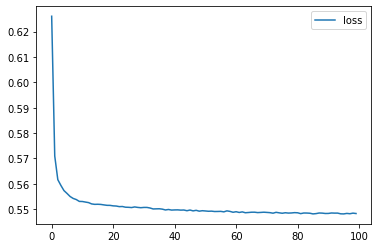

In [106]:
import matplotlib.pyplot as plt

# Plot the loss
history_df.plot(y="loss")
plt.show()

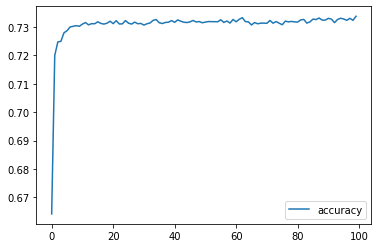

In [107]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [108]:
# Evaluate the model using the test data
model_loss, model_accuracy, model_auc = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5560 - accuracy: 0.7276 - auc: 0.7818 - 354ms/epoch - 1ms/step
Loss: 0.5560345649719238, Accuracy: 0.727580189704895


In [110]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE

!mkdir -p saved_model
nn.save('saved_model/AlphabetSoupCharity.h5')


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


In [ ]:
#Adding more neurons to a hidden layer.

In [ ]:
#Using different activation functions for the hidden layers.

In [ ]:
#Adding or reducing the number of epochs to the training regimen

In [ ]:
#Adjusting the input data to ensure that there are no variables or outliers that are causing confusion in the model, such as:
#Dropping more or fewer columns.
#Creating more bins for rare occurrences in columns.
#Increasing or decreasing the number of values for each bin.
#Adding more neurons to a hidden layer.
#Adding more hidden layers.
#Using different activation functions for the hidden layers.
#Adding or reducing the number of epochs to the training regimen

In [ ]:
#Data Preprocessing
#What variable(s) are considered the target(s) for your model?
#What variable(s) are considered to be the features for your model?
#What variable(s) are neither targets nor features, and should be removed from the input data?
#Compiling, Training, and Evaluating the Model
#How many neurons, layers, and activation functions did you select for your neural network model, and why?
#Were you able to achieve the target model performance?
#What steps did you take to try and increase model performance?